## Usco Lightcurve Plot

In [61]:
#Get the imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [62]:
#The data

In [63]:
data = (

[59755.22,	2.6,	0.005,	0.036],
[59755.22,	3.4,	0.0002,	0.022],
[59755.22,	5.1,	0.013,	0.023],
[59755.22,	7.0,	0.061,	0.019],
[59755.22,	13.7,	0.211,	0.027],
[59755.22,	16.5,	0.216,	0.032],
[59755.22,	31.1,	0.424,	0.081],
[59755.22,	34.9,	0.452,	0.099],
[59769.25,	2.6,	0.019,	0.032],
[59769.25,	3.4,	0.013,	0.028],
[59769.25,	5.1,	0.065,	0.031],
[59769.25,	7.0,	0.115,	0.029],
[59769.25,	13.7,	0.125,	0.031],
[59769.25,	16.5,	0.169,	0.029],
[59769.25,	31.1,	0.010,	0.099],
[59769.25,	34.9,	0.193,	0.126],
[59776.14,	2.6,	0.002,	0.009],
[59776.14,	3.4,	0.010,	0.015],
[59776.14,	5.1,	0.017,	0.010],
[59776.14,	7.0,	0.057,	0.026],
[59776.14,	13.7,	0.105,	0.012],
[59776.14,	16.5,	0.108,	0.013],
[59776.14,	31.1,	0.185,	0.044],
[59776.14,	34.9,	0.152,	0.052],
[59796.03,	2.6,	-0.008,	0.038],
[59796.03,	3.4,	0.026,	0.025],
[59796.03,	5.1,	0.024,	0.022],
[59796.03,	7.0,	0.030,	0.020],
[59796.03,	13.7,	0.048,	0.025],
[59796.03,	16.5,	0.042,	0.029],
[59796.03,	31.1,	0.103,	0.072],
[59796.03,	34.9,	0.009,	0.083],
[59815.03,	2.6,	0.020,	0.057],
[59815.03,	3.4,	0.018,	0.027],
[59815.03,	5.1,	0.025,	0.024],
[59815.03,	7.0,	0.020,	0.023],
[59815.03,	13.7,	0.014,	0.022],
[59815.03,	16.5,	0.023,	0.027],
[59815.03,	31.1,	0.035,	0.065],
[59815.03,	34.9,	0.026,	0.070]

)

df =  pd.DataFrame(data, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

In [64]:
f2_6 = (
 [59755.22,	2.6,	0.005,	0.036],
    [59769.25,	2.6,	0.019,	0.032],
    [59776.14,	2.6,	0.002,	0.009],
    [59796.03,	2.6,	-0.008,	0.038],
    [59815.03,	2.6,	0.020,	0.057],
)

f3_4 = (
[59755.22,	3.4,	0.0002,	0.022],
    [59769.25,	3.4,	0.013,	0.028],
    [59776.14,	3.4,	0.010,	0.015],
    [59796.03,	3.4,	0.026,	0.025],
    [59815.03,	3.4,	0.018,	0.027],
)

f5_1 = (
[59755.22,	5.1,	0.013,	0.023],
    [59769.25,	5.1,	0.065,	0.031],
    [59776.14,	5.1,	0.017,	0.010],
    [59796.03,	5.1,	0.024,	0.022],
    [59815.03,	5.1,	0.025,	0.024],
)

f7 = (
[59755.22,	7.0,	0.061,	0.019],
    [59769.25,	7.0,	0.115,	0.029],
    [59776.14,	7.0,	0.057,	0.026],
    [59796.03,	7.0,	0.030,	0.020],
    [59815.03,	7.0,	0.020,	0.023],
)

f13_7 = (
[59755.22,	13.7,	0.211,	0.027],
    [59769.25,	13.7,	0.125,	0.031],
    [59776.14,	13.7,	0.105,	0.012],
    [59796.03,	13.7,	0.048,	0.025],
    [59815.03,	13.7,	0.014,	0.022],
)

f16_5 = (
[59755.22,	16.5,	0.216,	0.032],
    [59769.25,	16.5,	0.169,	0.029],
    [59776.14,	16.5,	0.108,	0.013],
    [59796.03,	16.5,	0.042,	0.029],
    [59815.03,	16.5,	0.023,	0.027],
)

f31_1 = (
[59755.22,	31.1,	0.424,	0.081],
    [59769.25,	31.1,	0.010,	0.099],
    [59776.14,	31.1,	0.185,	0.044],
    [59796.03,	31.1,	0.103,	0.072],
    [59815.03,	31.1,	0.035,	0.065],
)

f34_9 = (
[59755.22,	34.9,	0.452,	0.099],
    [59769.25,	34.9,	0.193,	0.126],
    [59776.14,	34.9,	0.152,	0.052],
    [59796.03,	34.9,	0.009,	0.083],
    [59815.03,	34.9,	0.026,	0.070]
)



In [65]:

df2_6 =  pd.DataFrame(f2_6, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df3_4 =  pd.DataFrame(f3_4, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df5_1 =  pd.DataFrame(f5_1, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df7 =  pd.DataFrame(f7, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df13_7 =  pd.DataFrame(f13_7, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df16_5 =  pd.DataFrame(f16_5, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df31_1 =  pd.DataFrame(f31_1, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df34_9 =  pd.DataFrame(f34_9, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

### Eruption on MJD 59736.72 (from Moriyama M., 2022, vsnet-alert 26798)

In [66]:
days2_6 = df2_6['MJD'] - 59736.72
flux2_6 = df2_6["Fluxdensity(mJy)"]
flux_err2_6 = np.sqrt(df2_6["error(mJy)"]**2 + (df2_6["Fluxdensity(mJy)"]*0.05)**2)

days3_4 = df3_4['MJD'] - 59736.72
flux3_4 = df3_4["Fluxdensity(mJy)"]
flux_err3_4 = np.sqrt(df3_4["error(mJy)"]**2 + (df3_4["Fluxdensity(mJy)"]*0.05)**2)

days5_1 = df5_1['MJD'] - 59736.72
flux5_1 = df5_1["Fluxdensity(mJy)"]
flux_err5_1 = np.sqrt(df5_1["error(mJy)"]**2 + (df5_1["Fluxdensity(mJy)"]*0.05)**2)

days7 = df7['MJD'] - 59736.72
flux7 = df7["Fluxdensity(mJy)"]
flux_err7 = np.sqrt(df7["error(mJy)"]**2 + (df7["Fluxdensity(mJy)"]*0.05)**2)

days13_7 = df13_7['MJD'] - 59736.72
flux13_7 = df13_7["Fluxdensity(mJy)"]
flux_err13_7 = np.sqrt(df13_7["error(mJy)"]**2 + (df13_7["Fluxdensity(mJy)"]*0.1)**2)

days16_5 = df16_5['MJD'] - 59736.72
flux16_5 = df16_5["Fluxdensity(mJy)"]
flux_err16_5 = np.sqrt(df16_5["error(mJy)"]**2 + (df16_5["Fluxdensity(mJy)"]*0.1)**2)

days31_1 = df31_1['MJD'] - 59736.72
flux31_1 = df31_1["Fluxdensity(mJy)"]
flux_err31_1 = np.sqrt(df31_1["error(mJy)"]**2 + (df31_1["Fluxdensity(mJy)"]*0.1)**2)

days34_9 = df34_9['MJD'] - 59736.72
flux34_9 = df34_9["Fluxdensity(mJy)"]
flux_err34_9 = np.sqrt(df34_9["error(mJy)"]**2 + (df34_9["Fluxdensity(mJy)"]*0.1)**2)

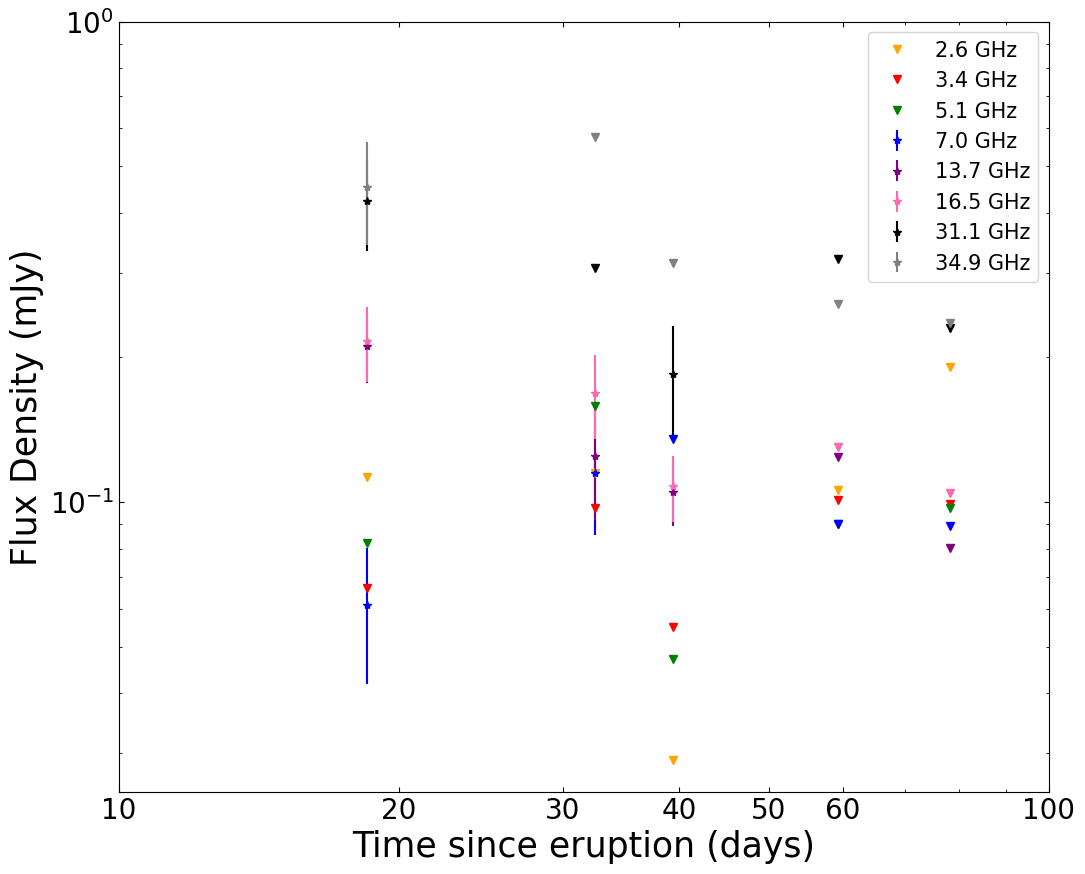

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

# Store which labels have already been used
used_labels = set()

def plot(days, fluxes, errors, color, label_name):
    for day, flux, err in zip(days, fluxes, errors):
        if flux < 3 * err:
            fmt = 'v'  # square for non-detection
            label =label_name if label_name not in used_labels else None  # no label for non-detections

            ax.errorbar(day, (flux+3*err), fmt=fmt, color=color, label=label)
            
        if flux > 3*err :
            fmt = '*'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, flux, yerr=err, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)

# Plot each band
plot(days2_6, flux2_6, flux_err2_6, 'orange', '2.6 GHz')

plot(days3_4, flux3_4, flux_err3_4, 'red', '3.4 GHz')

plot(days5_1, flux5_1, flux_err5_1, 'green', '5.1 GHz')

plot(days7, flux7, flux_err7, 'blue', '7.0 GHz')

plot(days13_7, flux13_7, flux_err13_7, 'purple', '13.7 GHz')

plot(days16_5, flux16_5, flux_err16_5, 'hotpink', '16.5 GHz')

plot(days31_1, flux31_1, flux_err31_1, 'black', '31.1 GHz')

plot(days34_9, flux34_9, flux_err34_9, 'grey', '34.9 GHz')

# Final plot formatting
ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,100], labels = ['10','20', '30', '40','50', '60','100'], fontsize = 20)
ax.set_yscale('log')
ax.set_yticks([0.1,1], labels = [r'$10^{-1}$',r'$10^{0}$'], fontsize = 20)
ax.set_xlabel("Time since eruption (days)", fontsize = 25)
ax.set_ylabel("Flux Density (mJy)", fontsize = 25)

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(fontsize = 15)
plt.savefig("USco_Light.png")
plt.show();

# Now for the optical data 

In [68]:
#optical data input

Usco_opt_unflitered = pd.read_csv('aavsodata_68fa5be46cab7.txt', header = 0)

#now to get only the vband

column_name = 'Band'
key = 'V'

Usco_opt_kinda = Usco_opt_unflitered[Usco_opt_unflitered[column_name].str.contains(key, na=False)]

Usco_opt = Usco_opt_kinda[~Usco_opt_kinda[column_name].str.contains('Vis.|CV', na=False)]

Usco_opt

,JD,Magnitude,Uncertainty,HQuncertainty,Band,Observer Code,Comment Code(s),Comp Star 1,Comp Star 2,Charts,...,Cmag,Kmag,HJD,Star Name,Observer Affiliation,Measurement Method,Grouping Method,ADS Reference,Digitizer,Credit
1,2.459737e+06,8.664,0.006,NaN,V,OMOA,NaN,ENSEMBLE,NaN,NaN,...,NaN,NaN,NaN,U SCO,AAVSO,STD,NaN,NaN,NaN,NaN
2,2.459737e+06,8.648,0.010,NaN,V,OMOA,NaN,ENSEMBLE,NaN,NaN,...,NaN,NaN,NaN,U SCO,AAVSO,STD,NaN,NaN,NaN,NaN
3,2.459737e+06,8.670,0.006,NaN,V,OMOA,NaN,ENSEMBLE,NaN,NaN,...,NaN,NaN,NaN,U SCO,AAVSO,STD,NaN,NaN,NaN,NaN
4,2.459737e+06,8.702,0.016,NaN,V,OMOA,NaN,ENSEMBLE,NaN,NaN,...,NaN,NaN,NaN,U SCO,AAVSO,STD,NaN,NaN,NaN,NaN
5,2.459737e+06,8.693,0.008,NaN,V,OMOA,NaN,ENSEMBLE,NaN,NaN,...,NaN,NaN,NaN,U SCO,AAVSO,STD,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41330,2.459788e+06,17.827,0.457,NaN,V,MDJ,NaN,ENSEMBLE,NaN,X26789AV,...,NaN,NaN,NaN,U SCO,LIADA,STD,NaN,NaN,NaN,NaN
41536,2.459790e+06,17.078,0.005,NaN,V,WGI,NaN,000-BJS-679,000-BJS-681,X28251ALV,...,16.383,16.775,NaN,U SCO,BAV,STD,NaN,NaN,NaN,NaN
41608,2.459791e+06,16.969,0.006,NaN,V,WGI,NaN,000-BJS-679,000-BJS-681,X28251ALV,...,16.383,21.296,NaN,U SCO,BAV,STD,NaN,NaN,NaN,NaN
41678,2.459792e+06,17.173,0.008,NaN,V,WGI,NaN,000-BJS-679,000-BJS-681,X28251ALV,...,16.383,16.679,NaN,U SCO,BAV,STD,NaN,NaN,NaN,NaN


In [73]:
#MJD/t0 = 59736.72
#JD = 2459736.72

opticaldays = ((Usco_opt['JD'].astype(float)) - 2459736.72)
vmag = Usco_opt['Magnitude'].astype(float)
error_vmag = Usco_opt['Uncertainty'].astype(float)

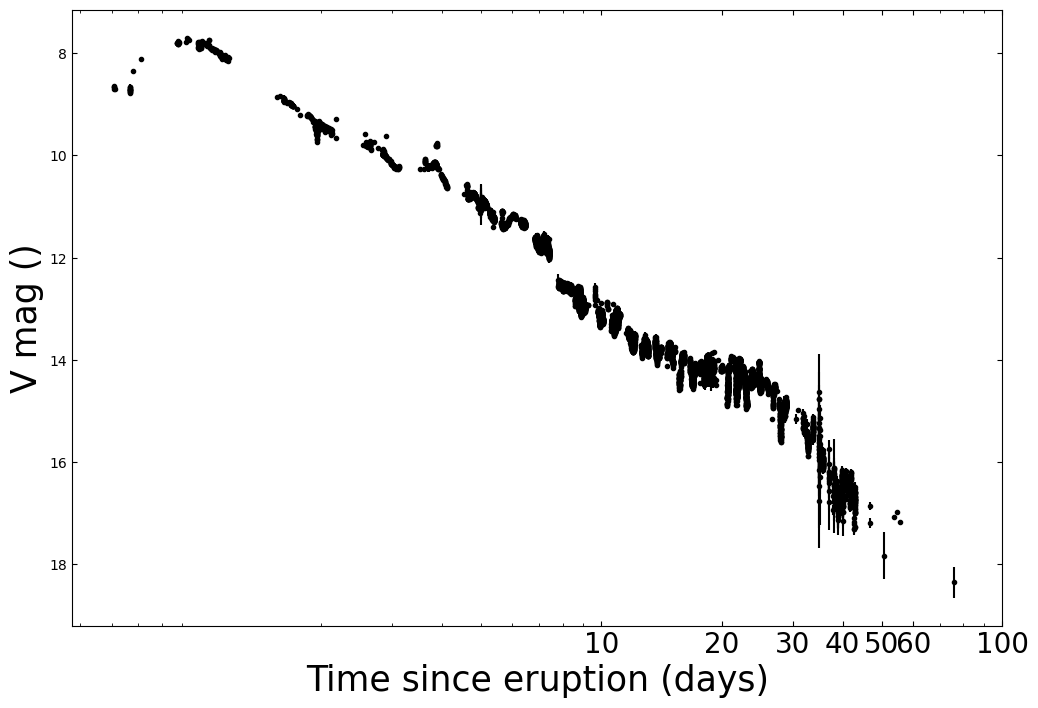

In [78]:
fig, ax = plt.subplots()

fig.set_size_inches(12,8)

ax.errorbar( opticaldays, vmag, yerr=error_vmag, fmt='.', color='black')

ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,100], labels = ['10','20', '30', '40','50', '60','100'], fontsize = 20)
#ax.set_yscale('log')
#ax.set_yticks([0.1,1], labels = [r], fontsize = 20)
ax.invert_yaxis()
ax.set_xlabel("Time since eruption (days)", fontsize = 25)
ax.set_ylabel("V mag ()", fontsize = 25)

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.show();

# Now both together

In [95]:
#detection lists

mask0 =  df2_6['Fluxdensity(mJy)'] > 3 * np.sqrt(df2_6["error(mJy)"]**2 + (df2_6["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days2_6d = df2_6['MJD'][mask0] - 59736.72
flux2_6d = df2_6["Fluxdensity(mJy)"][mask0]
flux_err2_6d = np.sqrt(df2_6["error(mJy)"][mask0]**2 + (df2_6["Fluxdensity(mJy)"][mask0]*0.05)**2)

mask1 =  df3_4['Fluxdensity(mJy)'] > 3 * np.sqrt(df3_4["error(mJy)"]**2 + (df3_4["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days3_4d = df3_4['MJD'][mask1] - 59736.72
flux3_4d = df3_4["Fluxdensity(mJy)"][mask1]
flux_err3_4d = np.sqrt(df3_4["error(mJy)"][mask0]**2 + (df3_4["Fluxdensity(mJy)"][mask1]*0.05)**2)

mask2 =  df5_1['Fluxdensity(mJy)'] > 3 * np.sqrt(df5_1["error(mJy)"]**2 + (df5_1["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days5_1d = df5_1['MJD'][mask2] - 59736.72
flux5_1d = df5_1["Fluxdensity(mJy)"][mask2]
flux_err5_1d = np.sqrt(df5_1["error(mJy)"][mask2]**2 + (df5_1["Fluxdensity(mJy)"][mask2]*0.05)**2)

mask3 =  df7['Fluxdensity(mJy)'] > 3 * np.sqrt(df7["error(mJy)"]**2 + (df7["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days7d = df7['MJD'][mask3] - 59736.72
flux7d = df7["Fluxdensity(mJy)"][mask3]
flux_err7d = np.sqrt(df7["error(mJy)"][mask3]**2 + (df7["Fluxdensity(mJy)"][mask3]*0.05)**2)

mask4 =  df13_7['Fluxdensity(mJy)'] > 3 * np.sqrt(df13_7["error(mJy)"]**2 + (df13_7["Fluxdensity(mJy)"]*0.1)**2) #don't show the non-detections
days13_7d = df13_7['MJD'][mask4] - 59736.72
flux13_7d = df13_7["Fluxdensity(mJy)"][mask4]
flux_err13_7d = np.sqrt(df13_7["error(mJy)"][mask4]**2 + (df13_7["Fluxdensity(mJy)"][mask4]*0.1)**2)

mask5 =  df16_5['Fluxdensity(mJy)'] > 3 * np.sqrt(df16_5["error(mJy)"]**2 + (df16_5["Fluxdensity(mJy)"]*0.1)**2) #don't show the non-detections
days16_5d = df16_5['MJD'][mask5] - 59736.72
flux16_5d = df16_5["Fluxdensity(mJy)"][mask5]
flux_err16_5d = np.sqrt(df16_5["error(mJy)"][mask5]**2 + (df16_5["Fluxdensity(mJy)"][mask5]*0.1)**2)


mask6 =  df31_1['Fluxdensity(mJy)'] > 3 * np.sqrt(df31_1["error(mJy)"]**2 + (df31_1["Fluxdensity(mJy)"]*0.1)**2) #don't show the non-detections
days31_1d = df31_1['MJD'][mask6] - 59736.72
flux31_1d = df31_1["Fluxdensity(mJy)"][mask6]
flux_err31_1d = np.sqrt(df31_1["error(mJy)"][mask6]**2 + (df31_1["Fluxdensity(mJy)"][mask6]*0.1)**2)

mask7 =  df34_9['Fluxdensity(mJy)'] > 3 * np.sqrt(df34_9["error(mJy)"]**2 + (df34_9["Fluxdensity(mJy)"]*0.1)**2) #don't show the non-detections
days34_9d = df34_9['MJD'][mask7] - 59736.72
flux34_9d = df34_9["Fluxdensity(mJy)"][mask7]
flux_err34_9d = np.sqrt(df34_9["error(mJy)"][mask7]**2 + (df34_9["Fluxdensity(mJy)"][mask7]*0.1)**2)

In [96]:
# non detection lists

mask0 =  df2_6['Fluxdensity(mJy)'] < 3 * np.sqrt(df2_6["error(mJy)"]**2 + (df2_6["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days2_6nd = df2_6['MJD'][mask0] - 59736.72
flux2_6nd = df2_6["Fluxdensity(mJy)"][mask0]
flux_err2_6nd = np.sqrt(df2_6["error(mJy)"][mask0]**2 + (df2_6["Fluxdensity(mJy)"][mask0]*0.05)**2)

mask1 =  df3_4['Fluxdensity(mJy)'] < 3 * np.sqrt(df3_4["error(mJy)"]**2 + (df3_4["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days3_4nd = df3_4['MJD'][mask1] - 59736.72
flux3_4nd = df3_4["Fluxdensity(mJy)"][mask1]
flux_err3_4nd = np.sqrt(df3_4["error(mJy)"][mask0]**2 + (df3_4["Fluxdensity(mJy)"][mask1]*0.05)**2)

mask2 =  df5_1['Fluxdensity(mJy)'] < 3 * np.sqrt(df5_1["error(mJy)"]**2 + (df5_1["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days5_1nd = df5_1['MJD'][mask2] - 59736.72
flux5_1nd = df5_1["Fluxdensity(mJy)"][mask2]
flux_err5_1nd = np.sqrt(df5_1["error(mJy)"][mask2]**2 + (df5_1["Fluxdensity(mJy)"][mask2]*0.05)**2)

mask3 =  df7['Fluxdensity(mJy)'] < 3 * np.sqrt(df7["error(mJy)"]**2 + (df7["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days7nd = df7['MJD'][mask3] - 59736.72
flux7nd = df7["Fluxdensity(mJy)"][mask3]
flux_err7nd = np.sqrt(df7["error(mJy)"][mask3]**2 + (df7["Fluxdensity(mJy)"][mask3]*0.05)**2)

mask4 =  df13_7['Fluxdensity(mJy)'] < 3 * np.sqrt(df13_7["error(mJy)"]**2 + (df13_7["Fluxdensity(mJy)"]*0.1)**2) #don't show the non-detections
days13_7nd = df13_7['MJD'][mask4] - 59736.72
flux13_7nd = df13_7["Fluxdensity(mJy)"][mask4]
flux_err13_7nd = np.sqrt(df13_7["error(mJy)"][mask4]**2 + (df13_7["Fluxdensity(mJy)"][mask4]*0.1)**2)

mask5 =  df16_5['Fluxdensity(mJy)'] < 3 * np.sqrt(df16_5["error(mJy)"]**2 + (df16_5["Fluxdensity(mJy)"]*0.1)**2) #don't show the non-detections
days16_5nd = df16_5['MJD'][mask5] - 59736.72
flux16_5nd = df16_5["Fluxdensity(mJy)"][mask5]
flux_err16_5nd = np.sqrt(df16_5["error(mJy)"][mask5]**2 + (df16_5["Fluxdensity(mJy)"][mask5]*0.1)**2)


mask6 =  df31_1['Fluxdensity(mJy)'] < 3 * np.sqrt(df31_1["error(mJy)"]**2 + (df31_1["Fluxdensity(mJy)"]*0.1)**2) #don't show the non-detections
days31_1nd = df31_1['MJD'][mask6] - 59736.72
flux31_1nd = df31_1["Fluxdensity(mJy)"][mask6]
flux_err31_1nd = np.sqrt(df31_1["error(mJy)"][mask6]**2 + (df31_1["Fluxdensity(mJy)"][mask6]*0.1)**2)

mask7 =  df34_9['Fluxdensity(mJy)'] < 3 * np.sqrt(df34_9["error(mJy)"]**2 + (df34_9["Fluxdensity(mJy)"]*0.1)**2) #don't show the non-detections
days34_9nd = df34_9['MJD'][mask7] - 59736.72
flux34_9nd = df34_9["Fluxdensity(mJy)"][mask7]
flux_err34_9nd = np.sqrt(df34_9["error(mJy)"][mask7]**2 + (df34_9["Fluxdensity(mJy)"][mask7]*0.1)**2)

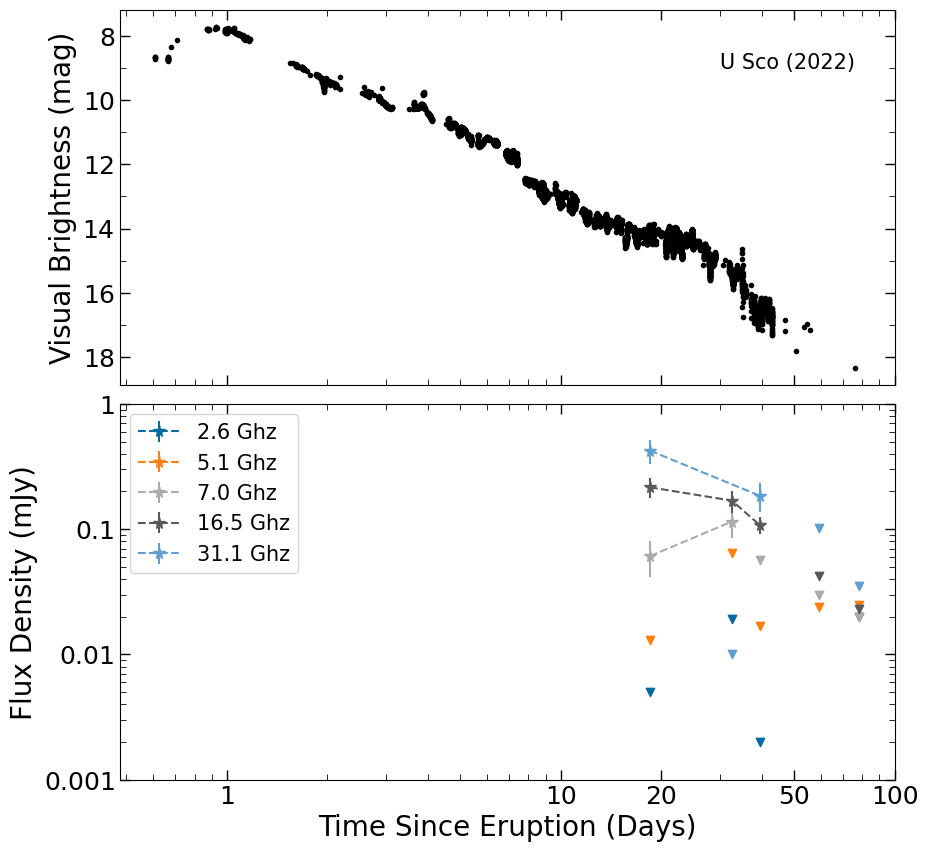

In [135]:
plt.style.use('tableau-colorblind10')

from matplotlib.ticker import AutoMinorLocator

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharey=False, sharex = True)#, constrained_layout=True)


#first the visual
axs[0].scatter(opticaldays, vmag, marker = '.', color = 'black')
axs[0].annotate('U Sco (2022)',(30,9), fontsize=15)

axs[0].set_xscale('log')
#axs[0].set_yscale('log')

axs[0].set_ylabel('Visual Brightness (mag)',fontsize =20)

axs[0].set_yticks([8,10,12,14,16,18], labels = [r'$8$',r'$10$', r'$12$', r'$14$',r'$16$', r'$18$'], fontsize = 18)
axs[0].invert_yaxis()
axs[0].tick_params(which='minor', length=4, direction = 'in', top=True, labeltop=False, left=True, labelleft=False, bottom=True, labelbottom=False, right = True,labelright = False)
axs[0].yaxis.set_minor_locator(AutoMinorLocator(2))  # 2 minor intervals between major ticks
axs[0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=False, right = True, labelright = False)


#now the radio
axs[1].set_ylabel('Flux Density (mJy)',fontsize=20)
axs[1].set_xlabel('Time Since Eruption (Days)', fontsize=20)
axs[1].set_xscale('log')
axs[1].set_yscale('log')



axs[1].errorbar(days2_6d, flux2_6d, yerr=flux_err2_6d, linestyle ='--', fmt = '*' , markersize = 8.5, label='2.6 Ghz')
#axs[1].errorbar(days3_4d, flux3_4d, yerr=flux_err3_4d, linestyle ='--', fmt = '*' , label='3.4 Ghz')
axs[1].errorbar(days5_1d, flux5_1d, yerr=flux_err5_1d, linestyle ='--', fmt = '*', markersize = 8.5, label='5.1 Ghz')
axs[1].errorbar(days7d, flux7d, yerr=flux_err7d, linestyle ='--', fmt = '*', markersize = 8.5 , label='7.0 Ghz')
#axs[1].errorbar(days13_7d, flux13_7d, yerr=flux_err13_7d, linestyle ='--', fmt = '*' , label='13.7 Ghz')
axs[1].errorbar(days16_5d, flux16_5d, yerr=flux_err16_5d, linestyle ='--', fmt = '*', markersize = 8.5 , label='16.5 Ghz')
axs[1].errorbar(days31_1d, flux31_1d, yerr=flux_err31_1d, linestyle ='--', fmt = '*' , markersize = 8.5, label='31.1 Ghz')
#axs[1].errorbar(days34_9d, flux34_9d, yerr=flux_err34_9d, linestyle ='--', fmt = '*' , label='34.9 Ghz')


axs[1].scatter(days2_6nd, flux2_6nd , marker = 'v')
#axs[1].scatter(days3_4nd, flux3_4nd , marker = 'v')
axs[1].scatter(days5_1nd, flux5_1nd , marker = 'v')
axs[1].scatter(days7nd, flux7nd , marker = 'v')
#axs[1].scatter(days13_7nd, flux13_7nd , marker = 'v')
axs[1].scatter(days16_5nd, flux16_5nd , marker = 'v')
axs[1].scatter(days31_1nd, flux31_1nd , marker = 'v')
#axs[1].scatter(days34_9nd, flux34_9nd , marker = 'v')


axs[1].legend(fontsize=15)

axs[1].set_xticks([1, 10,20,50,100], labels = ['1', '10','20','50','100'], fontsize = 18)
axs[1].set_yticks([0.001,0.01, .1,1.0], labels = [r'$0.001$',r'$0.01$',r'$0.1$',r'$1$'], fontsize = 18)

axs[1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
axs[1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)


fig.subplots_adjust(hspace=0.05)
plt.savefig("USco_Optical_and_Radio_lightcurves.png")
plt.show();